[OK] Found dataset: water_potability.csv
Shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


None

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000



Missing values per column:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Class balance:
 Potability
0    1998
1    1278
Name: count, dtype: int64
Train shape: (2620, 9)  Test shape: (656, 9)
Train class balance:
 Potability
0    0.609924
1    0.390076
Name: proportion, dtype: float64
Test class balance:
 Potability
0    0.609756
1    0.390244
Name: proportion, dtype: float64
Defined models: ['LogisticRegression', 'RandomForest']

=== LogisticRegression ===
Accuracy:  0.524
Precision: 0.415
Recall:    0.531
F1-score:  0.466
ROC-AUC:   0.547

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.52      0.57       400
           1       0.41      0.53      0.47       256

    accuracy                           0.52       656
   macro av

,model,accuracy,precision,recall,f1,roc_auc
0,LogisticRegression,0.524390,0.414634,0.531250,0.465753,0.547432
1,RandomForest,0.667683,0.648438,0.324219,0.432292,0.652617


Best model by F1: LogisticRegression


<Figure size 600x400 with 0 Axes>

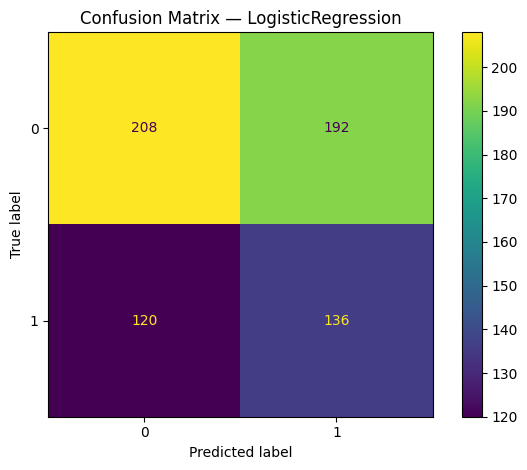

Top features:


,feature,importance
0,ph,0.129281
1,Sulfate,0.127645
2,Hardness,0.123122
3,Chloramines,0.115722
4,Solids,0.112476
5,Conductivity,0.100981
6,Turbidity,0.098749
7,Organic_carbon,0.096257
8,Trihalomethanes,0.095768


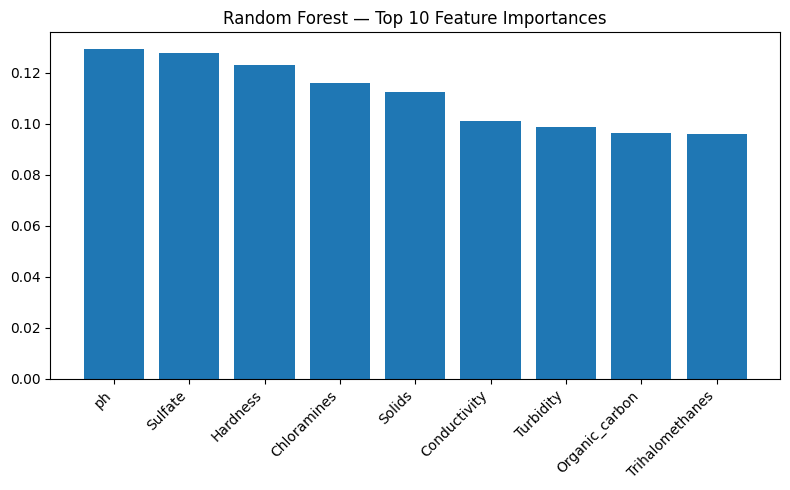

In [8]:
# 🌊 Week 2 — AI for Sustainable Water Quality Prediction
# Internship Track: Shell–Edunet Skills4Future → Model Selection & Building
# Your Topic: Water Resource Management → Predict Potability (safe vs unsafe)

# === 1) Setup & Imports ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, ConfusionMatrixDisplay
)

RANDOM_STATE = 42
pd.set_option('display.max_columns', None)

# === 2) Load Dataset ===
CSV_PATH = "water_potability.csv"

if not os.path.exists(CSV_PATH):
    print(f"[!] File '{CSV_PATH}' not found. Click the folder icon → Upload → select your water_potability.csv")
else:
    print("[OK] Found dataset:", CSV_PATH)

data = pd.read_csv(CSV_PATH)
print("Shape:", data.shape)
display(data.head())

# === 2.1) Sanity Checks ===
display(data.info())
display(data.describe())
print("\nMissing values per column:\n", data.isna().sum())
print("\nClass balance:\n", data['Potability'].value_counts(dropna=False))

# === 3) Train/Test Split ===
X = data.drop(columns=['Potability'])
y = data['Potability'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Test class balance:\n", y_test.value_counts(normalize=True))

# === 4) Build Baseline Models ===
pipe_lr = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=RANDOM_STATE)),
])

pipe_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)),
])

models = {
    "LogisticRegression": pipe_lr,
    "RandomForest": pipe_rf
}
print("Defined models:", list(models.keys()))

# === 5) Train & Evaluate Models ===
def evaluate_model(name, clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        roc = np.nan

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n=== {name} ===")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-score:  {f1:.3f}")
    if not np.isnan(roc):
        print(f"ROC-AUC:   {roc:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc
    }

results = []
fitted = {}

for name, clf in models.items():
    res = evaluate_model(name, clf, X_train, y_train, X_test, y_test)
    results.append(res)
    fitted[name] = clf

results_df = pd.DataFrame(results).sort_values(by="f1", ascending=False).reset_index(drop=True)
print("\n\nModel Comparison:")
display(results_df)

# === 6) Confusion Matrix (Best Model) ===
best_name = results_df.iloc[0]["model"]
best_model = fitted[best_name]
print("Best model by F1:", best_name)

fig = plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.show()

# === 7) Feature Importance (Random Forest) ===
if "RandomForest" in fitted:
    rf_pipe = fitted["RandomForest"]
    rf_clf = rf_pipe.named_steps["model"]

    importances = rf_clf.feature_importances_
    feat_names = X.columns

    imp_df = pd.DataFrame({"feature": feat_names, "importance": importances})
    imp_df = imp_df.sort_values(by="importance", ascending=False).reset_index(drop=True)

    print("Top features:")
    display(imp_df.head(10))

    top = imp_df.head(10)
    plt.figure(figsize=(8, 5))
    plt.bar(top["feature"], top["importance"])
    plt.title("Random Forest — Top 10 Feature Importances")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("RandomForest model not available; skipping feature importance.")
